In [ ]:
l1qlmKhaMNk

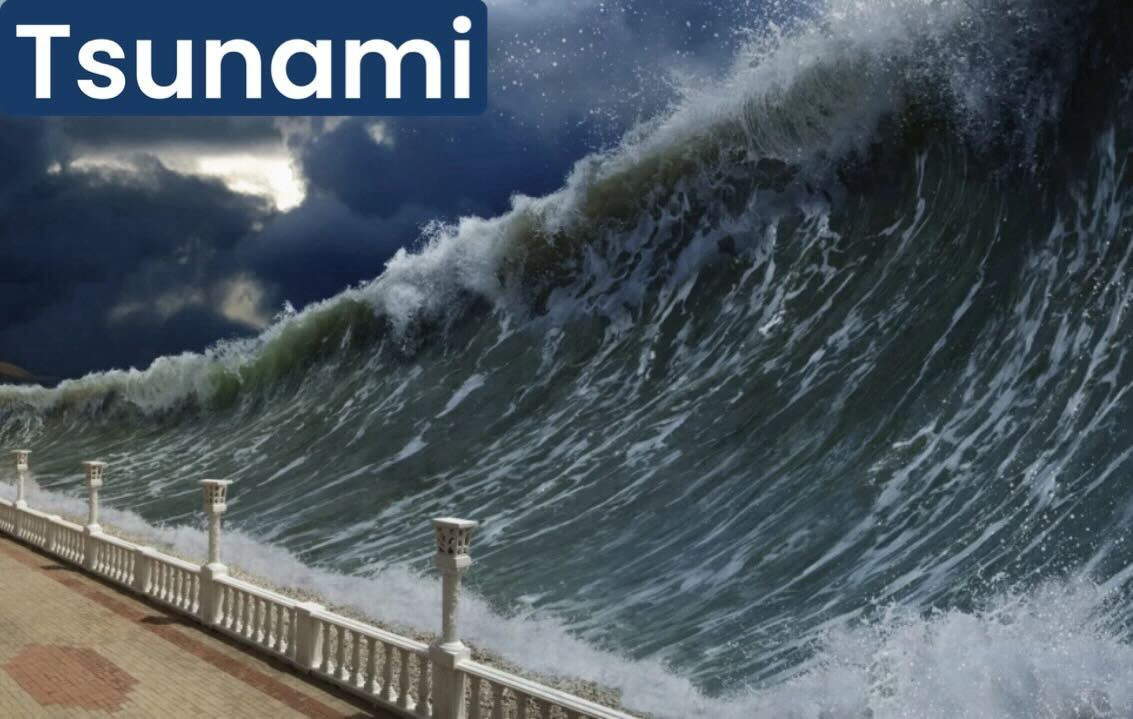

 Tsunamis are often triggered by undersea earthquakes, volcanic eruptions, or other events that displace large volumes of water. When a tsunami strikes a coastal area, it can cause immense devastation. Tsunamis are certainly considered natural disasters.
 
 I will answer three key questions based on the Tsunami dataset:


Which type of disaster has the highest frequency or occurrence?
What is the total number of confirmed tsunamis caused by the highest frequency or occurrence?
Which geographic region has experienced the highest number of tsunamis?

In [1]:
#import libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
from PIL import Image
from IPython.display import display
import cv2
from IPython.display import YouTubeVideo




In [2]:
# Use the Pathlib libary to set the path to the CSV
csv_path = ("tsunami_dataset.csv")


Question 1 

Sort through the data set to find out which type of disaster has the highest frequency or occurrence?

In [3]:
# Use the file path to read the CSV into a DataFrame and display a few rows
tsunami_oringinal_df = pd.read_csv(csv_path)
tsunami_oringinal_df.head()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS
0,12,-330,NaN,NaN,NaN,NaN,40.00,25.000,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,...,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"330 B.C. Aegean Sea, Sporades Islands, 40 N 25..."
1,481,1764,2.0,11.0,NaN,NaN,51.45,-2.583,"BRISTOL, ENGLAND",UK,...,Unknown,Very Doubtful Tsunami,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"Reference #1894, in full: ""On Saturday the 11t..."
2,71,859,NaN,NaN,NaN,NaN,36.08,36.250,SAMANDAGI,TURKEY,...,Earthquake,Questionable Tsunami,NaN,NaN,3.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"859 (possibly 861), November. Levantian Sea, N..."
3,186,1580,1.0,NaN,NaN,NaN,40.00,128.000,YELLOW SEA,NORTH KOREA,...,Unknown,Very Doubtful Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...
4,5,-1300,NaN,NaN,NaN,NaN,39.96,26.240,"IONIAN COASTS, TROAD",TURKEY,...,Unknown,Questionable Tsunami,6.0,NaN,5.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,1300 B.C. Ionian and Aegean Seas. References t...


In [4]:
# Use the `drop` function to drop  columns that i don't need
tsunami_oringinal_df.drop(columns=['ID','MONTH','LOCATION_NAME','YEAR','REGION','COUNTRY','DAY','HOUR','MINUTE','LATITUDE','LONGITUDE','EQ_MAGNITUDE','EQ_DEPTH','TS_INTENSITY','DAMAGE_TOTAL_DESCRIPTION','HOUSES_TOTAL_DESCRIPTION','DEATHS_TOTAL_DESCRIPTION','URL','COMMENTS',], inplace=True)
tsunami_oringinal_df.head()

,CAUSE,EVENT_VALIDITY
0,Earthquake,Very Doubtful Tsunami
1,Unknown,Very Doubtful Tsunami
2,Earthquake,Questionable Tsunami
3,Unknown,Very Doubtful Tsunami
4,Unknown,Questionable Tsunami


In [5]:
# using the .isnull function to check for nulls which are missing or NAN values in a dataframe
tsunami_oringinal_df.isnull()

,CAUSE,EVENT_VALIDITY
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2254,False,False
2255,False,False
2256,False,False
2257,False,False


In [6]:
#Use the dropna. function to remove missing or NAN values from the dataframe
tsunami_oringinal_df.dropna(inplace=True)
tsunami_oringinal_df

,CAUSE,EVENT_VALIDITY
0,Earthquake,Very Doubtful Tsunami
1,Unknown,Very Doubtful Tsunami
2,Earthquake,Questionable Tsunami
3,Unknown,Very Doubtful Tsunami
4,Unknown,Questionable Tsunami
...,...,...
2254,Earthquake,Definite Tsunami
2255,Earthquake,Definite Tsunami
2256,Earthquake,Probable Tsunami
2257,Earthquake,Very Doubtful Tsunami


In [7]:
# created a cause count to see the sum of each cause in the dataframe which turned the dataframe into a series
tsunami_oringinal_df['CAUSE'].value_counts()
cause_count = tsunami_oringinal_df['CAUSE'].value_counts() 
print(cause_count)

Earthquake                  1743
Unknown                      157
Volcano                      108
Earthquake and Landslide     105
Landslide                     83
Meteorological                26
Volcano and Earthquake        13
Questionable Earthquake       12
Volcano and Landslide         10
Explosion                      1
Name: CAUSE, dtype: int64


In [8]:
# Used the pd.DataFrame function to create a dataframe from the cause count series

tsunami_cause_df = pd.DataFrame(cause_count)
tsunami_cause_df


,CAUSE
Earthquake,1743
Unknown,157
Volcano,108
Earthquake and Landslide,105
Landslide,83
Meteorological,26
Volcano and Earthquake,13
Questionable Earthquake,12
Volcano and Landslide,10
Explosion,1


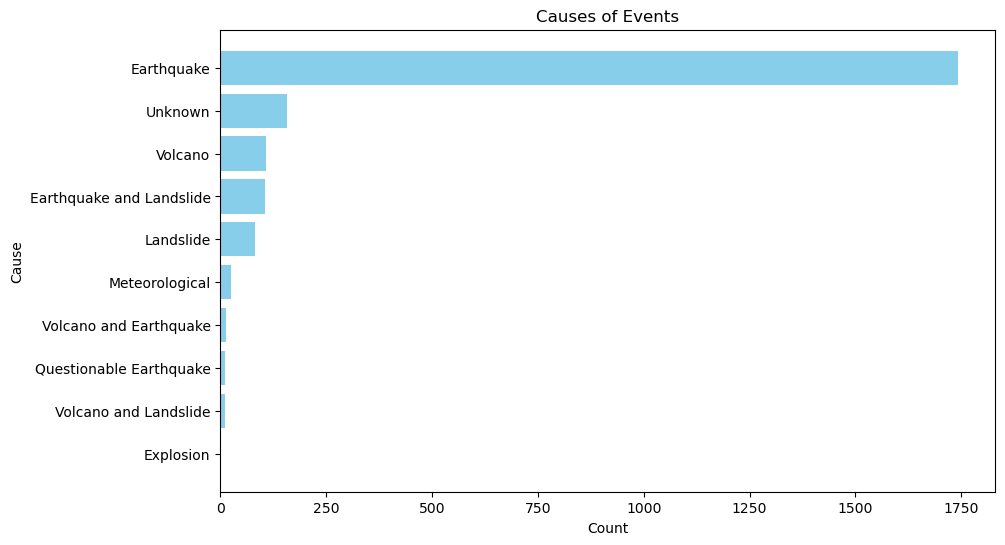

In [9]:
#create a bar chart with tsunami cause data
# Define the data
causes = [
    'Earthquake',
    'Unknown',
    'Volcano',
    'Earthquake and Landslide',
    'Landslide',
    'Meteorological',
    'Volcano and Earthquake',
    'Questionable Earthquake',
    'Volcano and Landslide',
    'Explosion'
]

counts = [1743, 157, 108, 105, 83, 26, 13, 12, 10, 1]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(causes, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Cause')
plt.title('Causes of Events')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest count at the top

# Display the chart
plt.show()


Question 1 


Which type of disaster has the highest frequency or occurrence?


Answer

The disaster type with the highest occurrence is earthquakes, accounting for a total of 1734 instances.

Question 2

What is the total number of confirmed Tsunamis caused by Earthquakes?


In [10]:
# print the dataframe that already has been create with the columns needs to answer the question
tsunami_oringinal_df

,CAUSE,EVENT_VALIDITY
0,Earthquake,Very Doubtful Tsunami
1,Unknown,Very Doubtful Tsunami
2,Earthquake,Questionable Tsunami
3,Unknown,Very Doubtful Tsunami
4,Unknown,Questionable Tsunami
...,...,...
2254,Earthquake,Definite Tsunami
2255,Earthquake,Definite Tsunami
2256,Earthquake,Probable Tsunami
2257,Earthquake,Very Doubtful Tsunami


In [11]:
# created a event validity count to see the sum of each event in the dataframe which turned the dataframe into a series
tsunami_oringinal_df['EVENT_VALIDITY'].value_counts()
event_validity_count = tsunami_oringinal_df['EVENT_VALIDITY'].value_counts() 
print(event_validity_count)

Definite Tsunami                                                     932
Questionable Tsunami                                                 464
Very Doubtful Tsunami                                                412
Probable Tsunami                                                     355
Event that only caused a seiche or disturbance in an inland river     95
Name: EVENT_VALIDITY, dtype: int64


In [12]:
# Used the pd.DataFrame function to create a dataframe from the event validity count series & printed it 

tsunami_event_validity_df = pd.DataFrame(event_validity_count)
tsunami_event_validity_df


,EVENT_VALIDITY
Definite Tsunami,932
Questionable Tsunami,464
Very Doubtful Tsunami,412
Probable Tsunami,355
Event that only caused a seiche or disturbance in an inland river,95


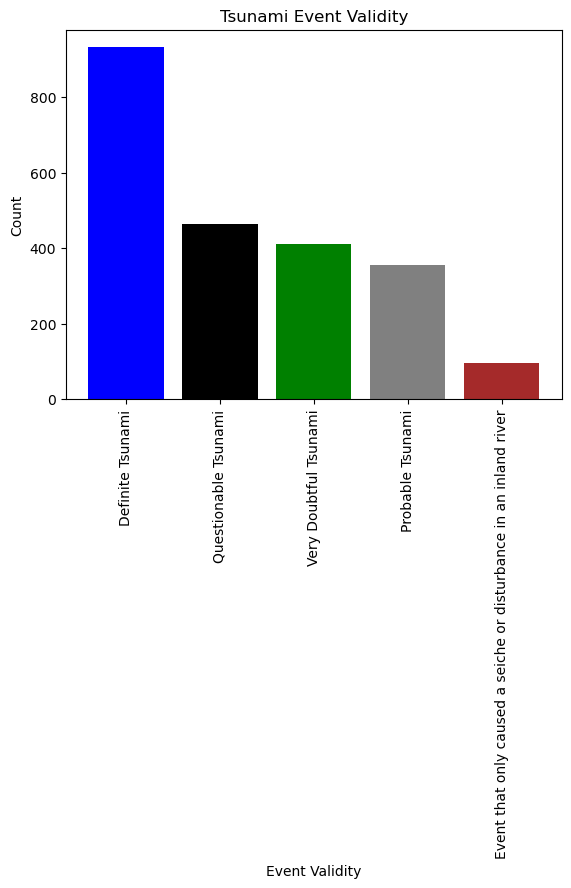

In [13]:
#create a barchart to dispaly Tsunami Event Validity using the data and count

data = {
    "EVENT_VALIDITY": [
        "Definite Tsunami",
        "Questionable Tsunami",
        "Very Doubtful Tsunami",
        "Probable Tsunami",
        "Event that only caused a seiche or disturbance in an inland river"
    ],
    "Count": [932, 464, 412, 355, 95]
}

colors = ["blue", "black", "green", "grey", "brown"]

plt.bar(data["EVENT_VALIDITY"], data["Count"], color=colors)
plt.xticks(rotation=90)
plt.xlabel("Event Validity")
plt.ylabel("Count")
plt.title("Tsunami Event Validity")
plt.show()


Question #2

What is the total number of confirmed Tsunamis caused by Earthquakes?




Answer

The number of verified Tsunamis stands at 932.



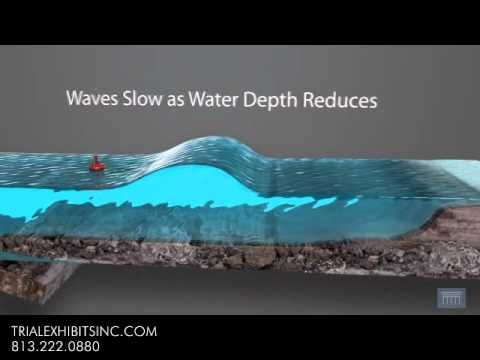

In [34]:
#input a youtube video to show how earthquakes triggered Tsunami 
video_id = "aHljDIDf6js"  
video = YouTubeVideo(video_id)
video


Qusetion #3 

Which geographic region has experienced the highest number of tsunamis?


In [15]:
# Use the file path to read the CSV into a DataFrame and display a few rows
tsunami_oringinal_df = pd.read_csv(csv_path)
tsunami_oringinal_df.head()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS
0,12,-330,NaN,NaN,NaN,NaN,40.00,25.000,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,...,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"330 B.C. Aegean Sea, Sporades Islands, 40 N 25..."
1,481,1764,2.0,11.0,NaN,NaN,51.45,-2.583,"BRISTOL, ENGLAND",UK,...,Unknown,Very Doubtful Tsunami,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"Reference #1894, in full: ""On Saturday the 11t..."
2,71,859,NaN,NaN,NaN,NaN,36.08,36.250,SAMANDAGI,TURKEY,...,Earthquake,Questionable Tsunami,NaN,NaN,3.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"859 (possibly 861), November. Levantian Sea, N..."
3,186,1580,1.0,NaN,NaN,NaN,40.00,128.000,YELLOW SEA,NORTH KOREA,...,Unknown,Very Doubtful Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...
4,5,-1300,NaN,NaN,NaN,NaN,39.96,26.240,"IONIAN COASTS, TROAD",TURKEY,...,Unknown,Questionable Tsunami,6.0,NaN,5.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,1300 B.C. Ionian and Aegean Seas. References t...


In [16]:
#COUNT HOW MANY TSUNAMIS HAPPENED IN EACH REGION
tsunami_oringinal_df['REGION'].value_counts()
region_count = tsunami_oringinal_df['REGION'].value_counts() 
print(region_count)



Mediterranean Sea                                    366
Japan                                                308
West Coast of South America                          228
New Caledonia, New Guinea, Solomon Is., Vanuatu      173
China, North and South Korea, Philippines, Taiwan    164
E Coast Australia, New Zealand, South Pacific Is.    150
West Coast of North and Central America              149
Indian Ocean (including west coast of Australia)     148
Indonesia (Pacific Ocean) and Malaysia               109
Caribbean Sea                                        108
Northeast Atlantic Ocean                              86
Kamchatka and Kuril Islands                           84
Alaska (including Aleutian Islands)                   71
East Coast USA and Canada, St Pierre and Miquelon     45
Black Sea and Caspian Sea                             24
Hawaii, Johnston Atoll, Midway I                      14
West Coast of Africa                                  10
Red Sea and Persian Gulf       

In [17]:
#created a dataframe from a seires 

region_count_df = pd.DataFrame(region_count)
region_count_df


,REGION
Mediterranean Sea,366
Japan,308
West Coast of South America,228
"New Caledonia, New Guinea, Solomon Is., Vanuatu",173
"China, North and South Korea, Philippines, Taiwan",164
"E Coast Australia, New Zealand, South Pacific Is.",150
West Coast of North and Central America,149
Indian Ocean (including west coast of Australia),148
Indonesia (Pacific Ocean) and Malaysia,109
Caribbean Sea,108


In [18]:
line_plot = region_count_df.hvplot.line(title='Regions that experienced Tsunamis', rot=55)
line_plot


:Curve   [index]   (REGION)

Question #3 
Which geographic region has experienced the highest number of tsunamis?

Answer
The region that has suffered the most tsunamis is the Mediterranean Sea.

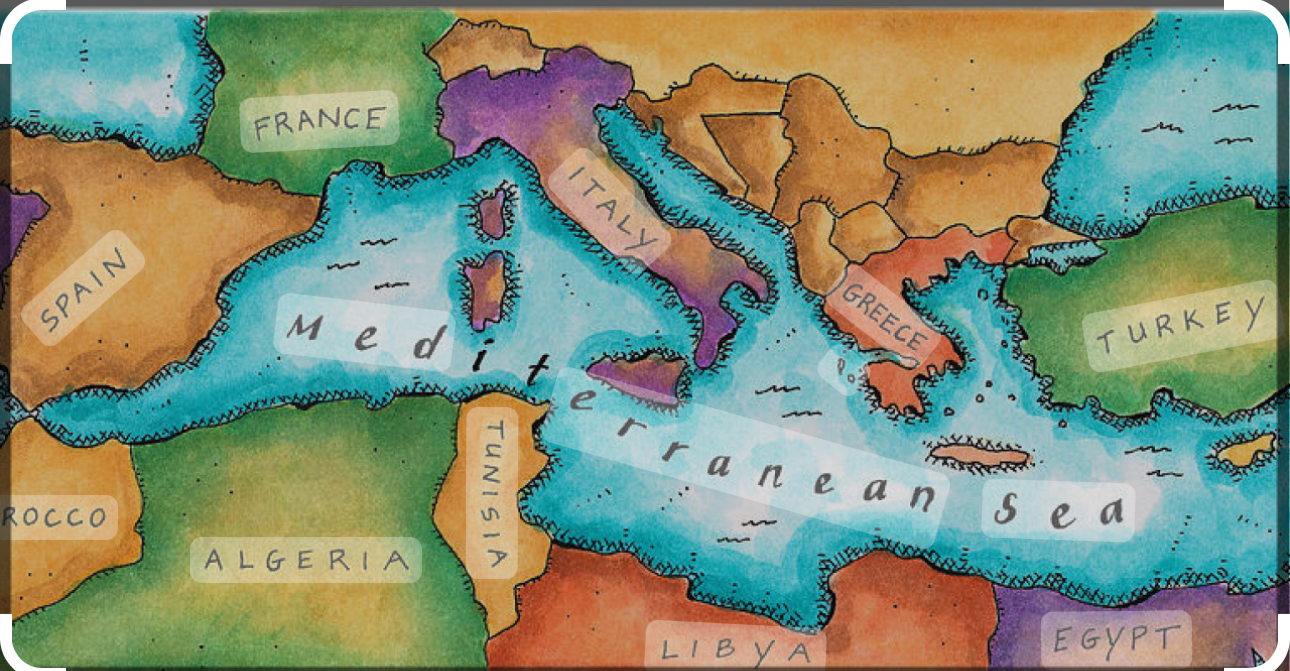

**Conclusion:**

The analysis of the tsunami data reveals that earthquakes are the most frequent disaster type, with a total of 1734 instances. Among these, 932 tsunamis have been confirmed as a result of earthquakes. Furthermore, the Mediterranean Sea is the geographic region that has encountered the highest number of tsunamis.

